In [1]:
import os
import tarfile
import urllib

In [5]:
Download_root='https://raw.githubusercontent.com/ageron/handson-ml2/master/'
Housing_path=os.path.join('datasets','housing')
Housing_url=download_root+'datasets/housing/housing.tgz'


In [6]:
def fetch_housing_data (housing_url=Housing_url,housing_path=Housing_path):
    os.makedirs(housing_path,exist_ok=True)
    tgz_path=os.path.join(housing_path, 'housing.tgz')
    urllib.request.urlretrieve(housing_url,tgz_path)
    housing_tgz=tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [7]:
fetch_housing_data()

In [8]:
import pandas as pd
def load_housing_data(housing_path=Housing_path):
    csv_path=os.path.join(housing_path,'housing.csv')
    return pd.read_csv(csv_path)

In [9]:
housing=load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [10]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [11]:
housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [12]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


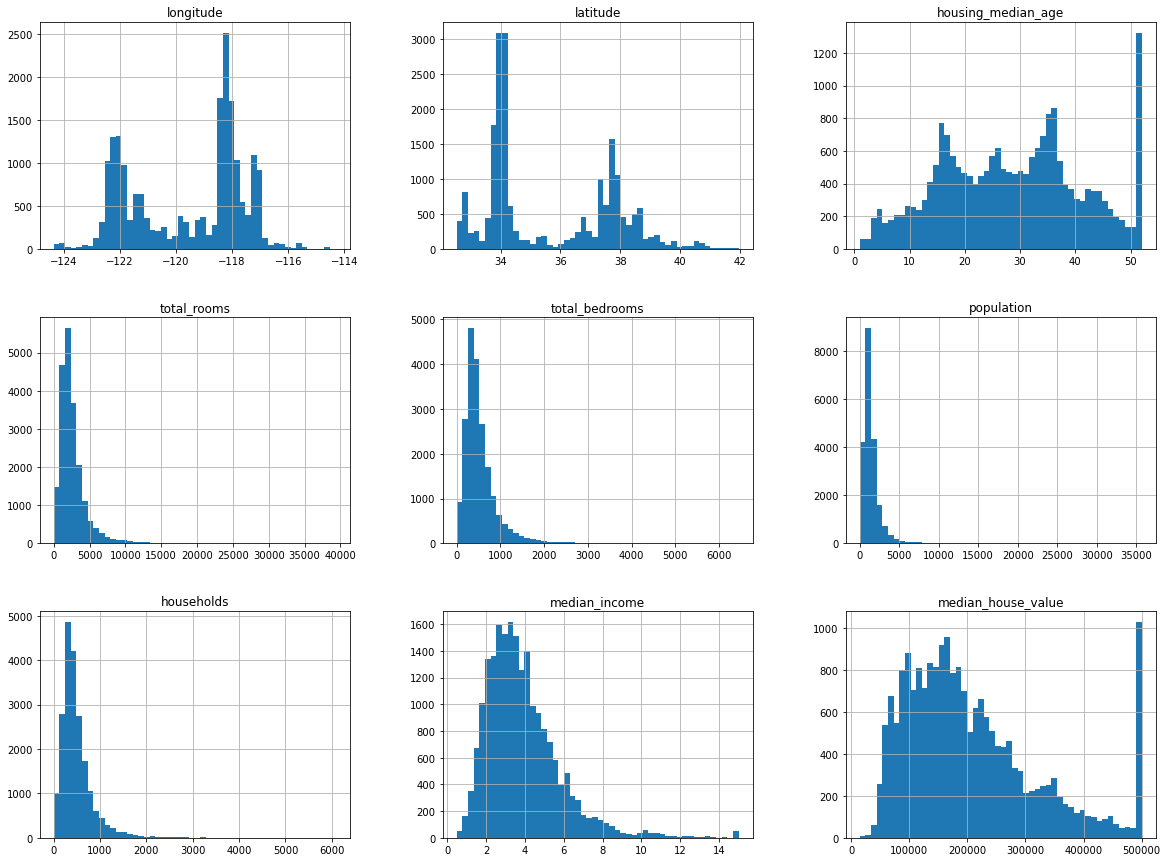

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,15))
plt.show()

In [15]:
def split_train_set(data, test_ratio):
    shuffled_indices=np.random.permutation(len(data))
    test_set_size=int(len(data)*test_ratio)
    test_indices=shuffled_indices[:test_set_size]
    train_indices=shuffled_indices[test_set_size:]
    return data.iloc[train_indices],data.iloc[test_indices]

In [17]:
import numpy as np

In [22]:
train_set, test_set=split_train_set(housing,0.2)
len(train_set)

16512

In [23]:
len(test_set)

4128

In [24]:
from zlib import crc32

def test_set_check(identifier, test_ratio):
    return crc32(np.int64(identifier))& 0xffffffff <test_ratio*2**32
def split_train_test_by_id(data, test_ratio,id_column):
    ids=data[id_column]
    in_test_set=ids.apply(lambda id_:test_set_check(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]


housing_with_id=housing.reset_index()
train_set,test_set=split_train_test_by_id(housing_with_id,0.2,'index')


In [36]:
housing_with_id['id']=housing['longitude']*1000+housing['latitude']
train_set,test_set=split_train_test_by_id(housing_with_id,0.2,'id')

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
 train_set,test_set=train_test_split(housing, test_size=0.2, random_state=42)
    

<AxesSubplot:>

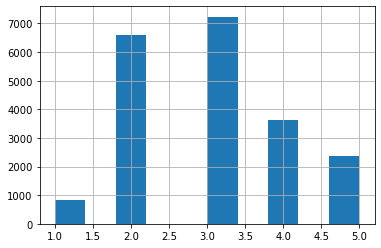

In [49]:
housing['income_cat']=pd.cut(housing['median_income'], bins=[0., 1.5, 3.0, 4.5, 6., np.inf],labels=[1,2,3,4,5])
housing['income_cat'].hist()

In [55]:
from sklearn.model_selection import StratifiedShuffleSplit
split=StratifiedShuffleSplit(n_splits=1,test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing ['income_cat']):
    strat_train_set=housing.loc[train_index]
    strat_test_set=housing.loc[test_index]
    
strat_test_set['income_cat'].value_counts()/len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114583
1    0.039729
Name: income_cat, dtype: float64

In [56]:
housing['income_cat'].value_counts()/len(housing)

3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: income_cat, dtype: float64

In [59]:
shuffled_ind=np.random.permutation(len(housing))
test_ind=shuffled_ind[:int(len(housing)*0.2)]
test1=housing.loc[test_ind]
test1['income_cat'].value_counts()/len(test1)

3    0.354409
2    0.312258
4    0.180233
5    0.112645
1    0.040455
Name: income_cat, dtype: float64

In [60]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop('income_cat', axis=1, inplace=True)

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

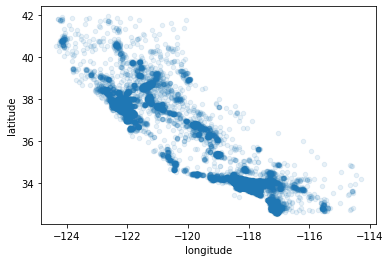

In [62]:
housing=strat_train_set.copy()
housing.plot(kind='scatter',x='longitude',y='latitude', alpha=0.1)

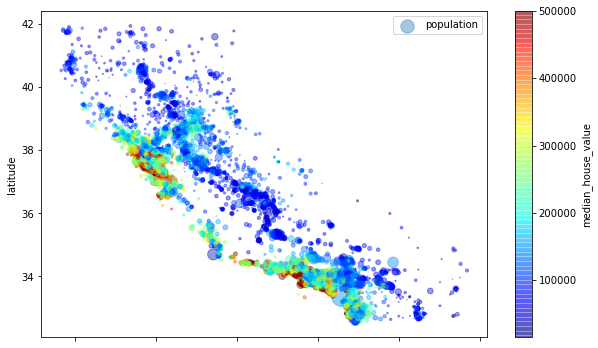

In [72]:
housing.plot(kind='scatter', x='longitude', y='latitude', alpha=0.4,
             s=housing['population']/100, label='population', figsize=(10,6),
             c='median_house_value', cmap=plt.get_cmap('jet'), colorbar=True,)
plt.legend()

In [74]:
corr_matrix=housing.corr()
corr_matrix['median_house_value']

longitude            -0.047432
latitude             -0.142724
housing_median_age    0.114110
total_rooms           0.135097
total_bedrooms        0.047689
population           -0.026920
households            0.064506
median_income         0.687160
median_house_value    1.000000
Name: median_house_value, dtype: float64

<AxesSubplot:xlabel='median_house_value', ylabel='latitude'>

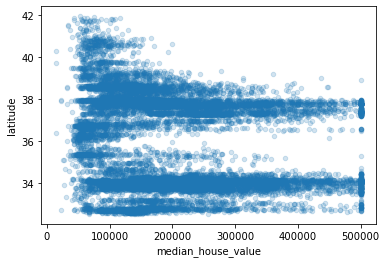

In [77]:
housing.plot(kind='scatter', x='median_house_value',y='latitude', alpha=0.2)

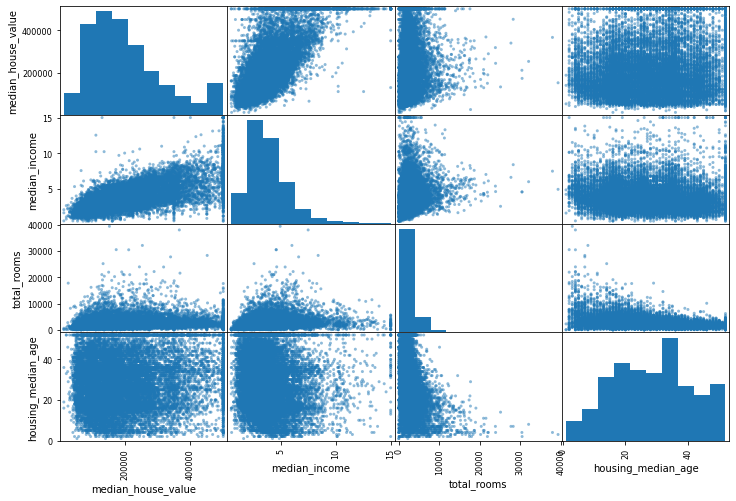

In [79]:
from pandas.plotting import scatter_matrix
attributes=['median_house_value','median_income', 'total_rooms','housing_median_age']
scatter_matrix(housing[attributes],figsize=(12,8))
plt.show()

In [81]:
housing['rooms_per_household']=housing['total_rooms']/housing['households']
housing['bedrooms_per_room']=housing['total_bedrooms']/housing['total_rooms']
housing['population_per_household']=housing['population']/housing['households']
corr_matrix=housing.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687160
rooms_per_household         0.146285
total_rooms                 0.135097
housing_median_age          0.114110
households                  0.064506
total_bedrooms              0.047689
population_per_household   -0.021985
population                 -0.026920
longitude                  -0.047432
latitude                   -0.142724
bedrooms_per_room          -0.259984
Name: median_house_value, dtype: float64